In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
movies_title_df  = pd.read_csv("F:/Project/Recommendation_system/dataset/movies.csv")

In [39]:
movies_title_df


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [20]:
movie_titles_df = movie_titles_df.drop(['genres'],axis=1)

In [21]:
movie_titles_df.head(5)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [22]:
movie_titles_df.tail(5)

,movieId,title
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)
9741,193609,Andrew Dice Clay: Dice Rules (1991)


In [27]:
movies_rating_df = pd.read_csv("F:/Project/Recommendation_system/dataset/ratings.csv")

In [28]:
movies_rating_df.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
movies_rating_df.tail(5)

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [30]:
movies_rating_df = movies_rating_df.drop(['timestamp'],axis=1)


In [31]:
movies_rating_df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [32]:
movies_rating_df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [33]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [40]:
movies_rating_df = pd.merge(movies_rating_df,movies_title_df,on='movieId')

In [41]:
movies_rating_df

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [43]:
movies_rating_df.drop(['genres'],axis=1,inplace=True)

In [44]:
movies_rating_df.shape

(100836, 4)

In [45]:
movies_rating_df.groupby('title').describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

In [47]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'71 (2014),1.0,4.000000,NaN,4.0,4.000,4.0,4.000,4.0
'Hellboy': The Seeds of Creation (2004),1.0,4.000000,NaN,4.0,4.000,4.0,4.000,4.0
'Round Midnight (1986),2.0,3.500000,0.000000,3.5,3.500,3.5,3.500,3.5
'Salem's Lot (2004),1.0,5.000000,NaN,5.0,5.000,5.0,5.000,5.0
'Til There Was You (1997),2.0,4.000000,1.414214,3.0,3.500,4.0,4.500,5.0
...,...,...,...,...,...,...,...,...
eXistenZ (1999),22.0,3.863636,0.804479,2.0,3.500,4.0,4.375,5.0
xXx (2002),24.0,2.770833,0.966607,0.5,2.375,3.0,3.500,4.0
xXx: State of the Union (2005),5.0,2.000000,0.500000,1.5,1.500,2.0,2.500,2.5


In [49]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [51]:
ratings_df_mean

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: mean, Length: 9719, dtype: float64

In [52]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']

In [53]:
ratings_df_count


title
'71 (2014)                                    1.0
'Hellboy': The Seeds of Creation (2004)       1.0
'Round Midnight (1986)                        2.0
'Salem's Lot (2004)                           1.0
'Til There Was You (1997)                     2.0
                                             ... 
eXistenZ (1999)                              22.0
xXx (2002)                                   24.0
xXx: State of the Union (2005)                5.0
¡Three Amigos! (1986)                        26.0
À nous la liberté (Freedom for Us) (1931)     1.0
Name: count, Length: 9719, dtype: float64

In [54]:
ratings_mean_count_df = pd.concat([ratings_df_count,ratings_df_mean],axis=1)

In [55]:
ratings_mean_count_df

,count,mean
title,,
'71 (2014),1.0,4.000000
'Hellboy': The Seeds of Creation (2004),1.0,4.000000
'Round Midnight (1986),2.0,3.500000
'Salem's Lot (2004),1.0,5.000000
'Til There Was You (1997),2.0,4.000000
...,...,...
eXistenZ (1999),22.0,3.863636
xXx (2002),24.0,2.770833
xXx: State of the Union (2005),5.0,2.000000


In [56]:
ratings_mean_count_df.reset_index()

,title,count,mean
0,'71 (2014),1.0,4.000000
1,'Hellboy': The Seeds of Creation (2004),1.0,4.000000
2,'Round Midnight (1986),2.0,3.500000
3,'Salem's Lot (2004),1.0,5.000000
4,'Til There Was You (1997),2.0,4.000000
...,...,...,...
9714,eXistenZ (1999),22.0,3.863636
9715,xXx (2002),24.0,2.770833
9716,xXx: State of the Union (2005),5.0,2.000000
9717,¡Three Amigos! (1986),26.0,3.134615


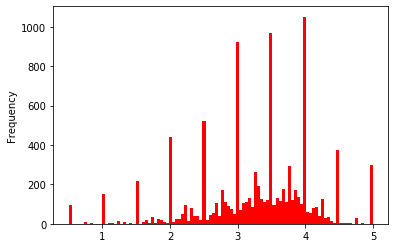

In [58]:
ratings_mean_count_df['mean'].plot(bins=100,kind='hist',color='red')

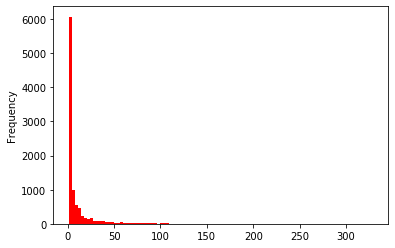

In [59]:
ratings_mean_count_df['count'].plot(bins=100,kind='hist',color='red')

In [61]:
ratings_mean_count_df[ ratings_mean_count_df['mean']==5 ]

,count,mean
title,,
'Salem's Lot (2004),1.0,5.0
12 Angry Men (1997),1.0,5.0
12 Chairs (1976),1.0,5.0
20 Million Miles to Earth (1957),1.0,5.0
61* (2001),1.0,5.0
...,...,...
Won't You Be My Neighbor? (2018),1.0,5.0
Wonder Woman (2009),1.0,5.0
World of Glory (1991),1.0,5.0


In [62]:
ratings_mean_count_df.sort_values('count',ascending = False).head(100)

,count,mean
title,,
Forrest Gump (1994),329.0,4.164134
"Shawshank Redemption, The (1994)",317.0,4.429022
Pulp Fiction (1994),307.0,4.197068
"Silence of the Lambs, The (1991)",279.0,4.161290
"Matrix, The (1999)",278.0,4.192446
...,...,...
Ghost (1990),115.0,3.434783
Waterworld (1995),115.0,2.913043
Catch Me If You Can (2002),115.0,3.921739


In [63]:
ratings_mean_count_df.sort_values('count',ascending = True).head(100)

,count,mean
title,,
'71 (2014),1.0,4.0
Latter Days (2003),1.0,3.5
"Late Shift, The (1996)",1.0,2.5
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),1.0,2.0
Late Night Shopping (2001),1.0,4.5
...,...,...
"Long, Hot Summer, The (1958)",1.0,4.0
Looker (1981),1.0,4.5
Looking for Comedy in the Muslim World (2005),1.0,3.5


In [65]:
ratings_mean_count_df.sort_values('mean',ascending = True).head(100)

,count,mean
title,,
Rust and Bone (De rouille et d'os) (2012),1.0,0.50
The Emoji Movie (2017),1.0,0.50
The Butterfly Effect 3: Revelations (2009),1.0,0.50
"Follow Me, Boys! (1966)",1.0,0.50
The Beast of Hollow Mountain (1956),1.0,0.50
...,...,...
Pokémon Heroes (2003),1.0,0.50
"Thing with Two Heads, The (1972)",2.0,0.75
Leonard Part 6 (1987),2.0,0.75


In [66]:
movies_rating_df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [69]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index='userId' ,columns='title',values='rating')

In [70]:
userid_movietitle_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [72]:
titanic = userid_movietitle_matrix['Titanic (1997)']

In [73]:
titanic

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    2.0
609    NaN
610    3.0
Name: Titanic (1997), Length: 610, dtype: float64

In [76]:
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic),columns=['Correlation'])

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [77]:
titanic_correlations = titanic_correlations.join(ratings_mean_count_df['count'])

In [78]:
titanic_correlations

,Correlation,count
title,,
'71 (2014),NaN,1.0
'Hellboy': The Seeds of Creation (2004),NaN,1.0
'Round Midnight (1986),NaN,2.0
'Salem's Lot (2004),NaN,1.0
'Til There Was You (1997),NaN,2.0
...,...,...
eXistenZ (1999),-0.129532,22.0
xXx (2002),0.174721,24.0
xXx: State of the Union (2005),0.790569,5.0


In [79]:
titanic_correlations.dropna(inplace=True)

In [80]:
titanic_correlations

,Correlation,count
title,,
"'burbs, The (1989)",0.135055,17.0
(500) Days of Summer (2009),0.272744,42.0
*batteries not included (1987),0.760886,7.0
10 Items or Less (2006),-1.000000,3.0
10 Things I Hate About You (1999),0.441756,54.0
...,...,...
[REC]² (2009),1.000000,3.0
eXistenZ (1999),-0.129532,22.0
xXx (2002),0.174721,24.0


In [81]:
titanic_correlations.sort_values('Correlation',ascending=False)

,Correlation,count
title,,
Ip Man 2 (2010),1.0,5.0
"Howling, The (1980)",1.0,5.0
Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's Tale) (2009),1.0,2.0
Thesis (Tesis) (1996),1.0,5.0
"Hand That Rocks the Cradle, The (1992)",1.0,9.0
...,...,...
Troll 2 (1990),-1.0,3.0
Ghost Rider: Spirit of Vengeance (2012),-1.0,5.0
"Mechanic, The (2011)",-1.0,4.0


In [84]:
titanic_correlations = titanic_correlations[titanic_correlations['count']>80]

In [85]:
titanic_correlations.sort_values('Correlation',ascending=False)

,Correlation,count
title,,
Titanic (1997),1.000000,140.0
Dances with Wolves (1990),0.683611,164.0
While You Were Sleeping (1995),0.636238,98.0
Star Trek: Generations (1994),0.616660,108.0
Top Gun (1986),0.513324,83.0
...,...,...
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),-0.186586,97.0
2001: A Space Odyssey (1968),-0.187154,109.0
"Fifth Element, The (1997)",-0.218503,116.0


In [86]:
userid_movietitle_matrix 

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [87]:
movie_correltaions = userid_movietitle_matrix.corr(method='pearson',min_periods=80)

In [88]:
movie_correltaions

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
myRatings = pd.read_csv("F:/Project/Recommendation_system/dataset/myratings.csv")

In [108]:
myRatings

,Movie Name,Ratings
0,Titanic (1997),5


In [109]:
myRatings['Movie Name'][0]

'Titanic (1997)'

In [111]:
similar_movies_list = pd.Series()

for i in range(0,1):
    similar_movie = movie_correltaions[ myRatings['Movie Name'][i] ].dropna()
    similar_movie = similar_movie.map(lambda x: x*myRatings['Ratings'][i] )
    similar_movies_list = similar_movies_list.append(similar_movie)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [112]:
similar_movies_list.sort_values(inplace=True,ascending = False)
print(similar_movies_list.head(10))

Titanic (1997)                                           5.000000
Shrek (2001)                                             1.562788
Star Wars: Episode I - The Phantom Menace (1999)         1.522347
Forrest Gump (1994)                                      1.449337
Sixth Sense, The (1999)                                  1.340490
Men in Black (a.k.a. MIB) (1997)                         1.289964
Star Wars: Episode V - The Empire Strikes Back (1980)    1.165111
Shawshank Redemption, The (1994)                         1.051564
Saving Private Ryan (1998)                               0.999119
Independence Day (a.k.a. ID4) (1996)                     0.825862
dtype: float64
